In [46]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import statsmodels.api as sm
print('loaded')

loaded


# TASK 3

In [2]:
#Loading Dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print('loaded')

loaded


In [47]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Category
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [48]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**The following describes the dataset variables:**

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# TASK 4

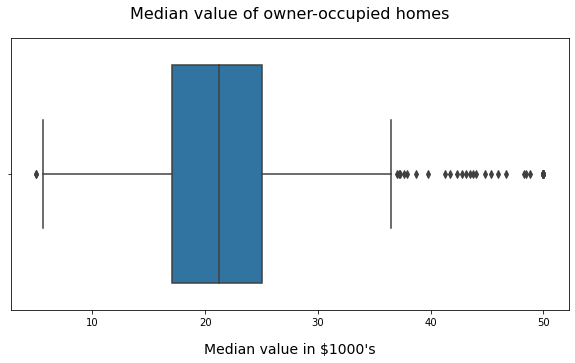

In [62]:
#Plotting Boxplot for the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(10,5))

ax = sns.boxplot(x = 'MEDV', data = boston_df)
ax.set_title("Median value of owner-occupied homes", size=16)
ax.set_xlabel("Median value in $1000's", size=14)

ax.title.set_position([0.5, 1.05])
ax.xaxis.labelpad = 15

plt.show()

What can you say about the Graph?

- Median House prices lies in the range of 15-30 (in 1000 Dollar). Though there are houses which costs more than 38000 Dollar, but they are mostly outliers.

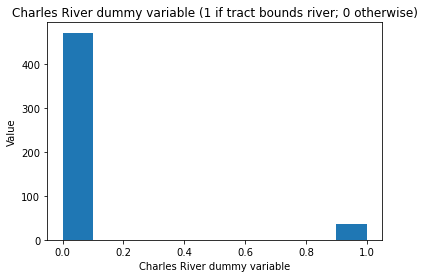

In [65]:
# Plotting a  histogram for the Charles river variable
plt.hist(boston_df['CHAS'])

plt.title("Charles River dummy variable (1 if tract bounds river; 0 otherwise)", size=12)
plt.xlabel("Charles River dummy variable", size=10)
plt.ylabel("Value", size=10)

plt.show()

What can you say about the Graph?

- CLose to 400 houses are tract bound

In [88]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "age less than 35"
boston_df.loc[((boston_df["AGE"]>35) & (boston_df["AGE"]<70)), "age_group"] = "age between 35 and 70"
boston_df.loc[(boston_df["AGE"]>=70), "age_group"] = "age more than 70"

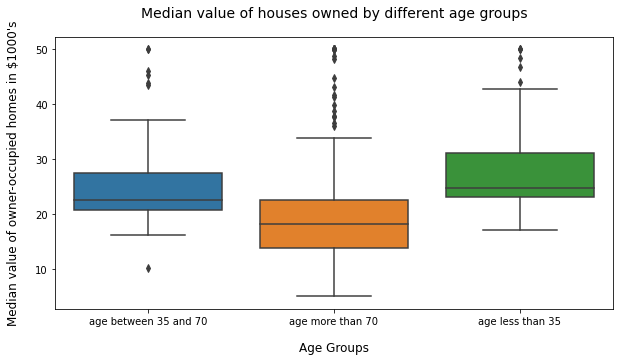

In [89]:
#Plotting Blotplot for MEDV variable vs the AGE variable
plt.figure(figsize=(10,5))

ax = sns.boxplot(x='age_group', y="MEDV", data=boston_df)

ax.set_xlabel("Age Groups", size=12)
ax.set_ylabel("Median value of owner-occupied homes in $1000's", size=12)
ax.set_title("Median value of houses owned by different age groups", size=14)

ax.title.set_position([0.5, 1.05])
ax.yaxis.labelpad = 15
ax.xaxis.labelpad = 15

plt.show()

What can you say about the Graph?

- People within the age bracket of 35 to 70, have houses that costs around 20k-30k Whereas people older than 70 have houses of average value of 20k. People with age less than 35 mostly have the most expensice properties startting a with minimum price approx 20000.

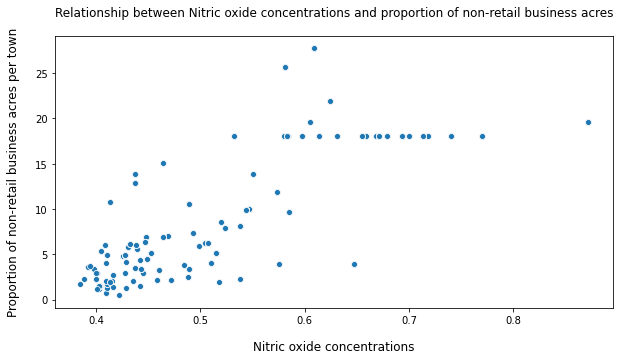

In [74]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

plt.figure(figsize=(10,5))

ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

ax.set_xlabel("Nitric oxide concentrations", size=12)
ax.set_ylabel("Proportion of non-retail business acres per town", size=12)
ax.set_title("Relationship between Nitric oxide concentrations and proportion of non-retail business acres", size=12)

ax.title.set_position([0.5, 1.05])
ax.yaxis.labelpad = 15
ax.xaxis.labelpad = 15

plt.show()

What can you say about the relationship?

- Looking at the plot above, the Pollution levels are higher, i.e. NOX in areas having less acre space. 

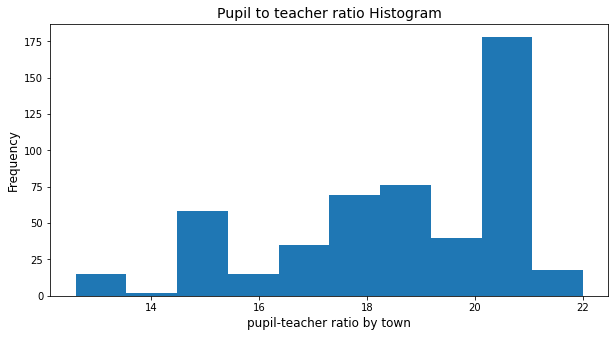

In [76]:
# Plotting a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(10,5))

plt.hist(boston_df["PTRATIO"])

plt.title("Pupil to teacher ratio Histogram", size=14)
plt.xlabel("pupil-teacher ratio by town", size=12)
plt.ylabel("Frequency", size=12)

plt.show()


What can you say about the Graph?
- pupil-teacher ratio frequency is highest at 21.

# TASK 5

## T- Test

### Is there a significant difference in median value of houses bounded by the Charles river or not?

State the hypothesis

-   $H_0:$ there is no significant difference in median value of houses bounded by the Charles river 
-   $H_1:$ there is a significant difference in median value of houses bounded by the Charles river 
- Assuming α = 0.05

In [77]:
# Performing Levene Test to check equality of variances
scipy.stats.levene(boston_df[boston_df["CHAS"]==1]["MEDV"],
                  boston_df[boston_df["CHAS"]==0]["MEDV"], center="mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value < 0.05, variances are not equal.

In [78]:
# Performing t-test
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==1]["MEDV"],
                  boston_df[boston_df["CHAS"]==0]["MEDV"], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05,  we reject the null hypothesis as there is enough proof that there is a statistical difference MEDV and CHAS
- House prices tend to be higher closer to the Charles River

## ANOVA

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

State the hypothesis

-   $H_0:$ there no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
-   $H_1:$ there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
- Assuming α = 0.05

**For permorning ANOVA, We have already categorised the AGE into three groups:**

- Age less than equal to 35 (age_less_than_35)
- Age between 35 and 70 (age_between_35_and_70)
- Age more than equal to 70 (age_more_than_70)

Created earlier while Discretize the age variable into three groups for the boxplot

In [97]:
# Test for equality of variance using Levene test
scipy.stats.levene(boston_df[boston_df["age_group"]=="age less than 35"]["MEDV"],
                  boston_df[boston_df["age_group"]=="age between 35 and 70"]["MEDV"],
                  boston_df[boston_df["age_group"]=="age more than 70"]["MEDV"],
                  center="mean")

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

**Conclusion** 
- Since P value is more than 0.05, we can assert that the variances are equal.

In [104]:
#separate the three samples (one for each age category) into a variable each

thirtyfive_lower = boston_df[boston_df['age_group'] == 'age less than 35']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'age between 35 and 70']['MEDV']
seventy_older =  boston_df[boston_df['age_group'] == 'age more than 70']['MEDV']

In [105]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

## Pearson Correlation Test

### Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?

State the hypothesis:

-   $H_0:$ No relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
-   $H_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- Assuming α = 0.05

In [33]:
# Running the Pearson Corelation Test
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion** - Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  NOX and INDUS


## Regression analysis

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

State the hypothesis:

-   $H_0:$ there is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
-   $H_1:$ there is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
- Assuming α = 0.05

In [39]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.21e-08
Time:                        10:33:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** 
- Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that there is an impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- The coefficient of 1.0916 means that Median value of owner-occupied homes increases by 1.0916
- The F-statistics value is 1.21e-08, which is less than 0.05, hence we can conclude that there exsists a relationship/correlation between DIS and MEDV.


## Author

This notebook is completed by Priyanka Tulsian in order to submit the final assessment for the Coursera Course, Statistics for Data Science with Python. The notebook is completed on 27th Decemeber.